# COURSE: A deep understanding of deep learning

## SECTION: ANNs

### LECTURE: ANN for classifying qwerties

#### TEACHER: Mike X Cohen, sincxpress.com

##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401


In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

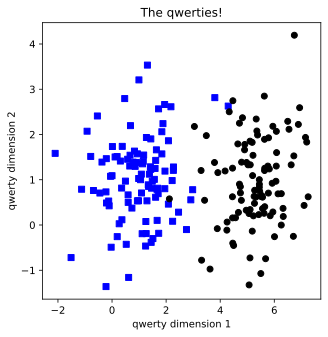

In [2]:
# create data

cluster_quantity = 100
blur = 1

A = [1, 1]
B = [5, 1]

# generate data
a = [
    A[0] + np.random.randn(cluster_quantity) * blur,
    A[1] + np.random.randn(cluster_quantity) * blur,
]
b = [
    B[0] + np.random.randn(cluster_quantity) * blur,
    B[1] + np.random.randn(cluster_quantity) * blur,
]

# true labels
labels_np = np.vstack((np.zeros((cluster_quantity, 1)), np.ones((cluster_quantity, 1))))

# concatanate into a matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], "bs")
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], "ko")
plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [4]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(" ")

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [5]:
# build the model
binary_ann_classifier = nn.Sequential(
    nn.Linear(2, 1),  # input layer
    nn.ReLU(),  # activation unit
    nn.Linear(1, 1),  # output unit
    nn.Sigmoid(),  # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
)

binary_ann_classifier

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [6]:
# other model features

learning_rate = 0.001

# loss function
loss_fn = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.Adam(binary_ann_classifier.parameters(), lr=learning_rate)

In [7]:
# train the model
total_epochs = 4000
losses = torch.zeros(total_epochs)

for epoch in range(total_epochs):
    # forward pass
    y_pred = binary_ann_classifier(data)

    # compute loss
    loss = loss_fn(y_pred, labels)
    losses[epoch] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

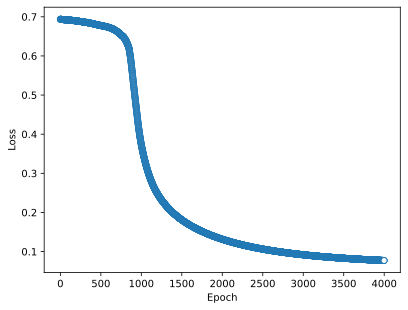

In [13]:
# show the losses

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [14]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = binary_ann_classifier(data)

pred_labels = predictions > 0.5

# find errors
misclassified = np.where(pred_labels != labels)[0]

# total accuracy
final_accuracy = 100 - 100 * len(misclassified) / (2 * cluster_quantity)

print(f"Final accuracy: {final_accuracy}%")

Final accuracy: 98.0%


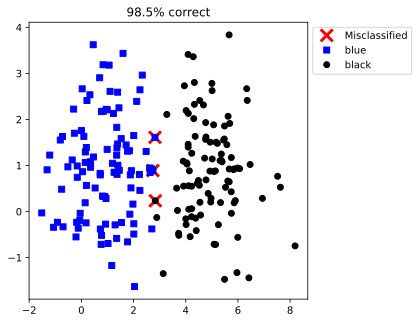

In [9]:
# plot the labeled data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[misclassified, 0],
    data[misclassified, 1],
    "rx",
    markersize=12,
    markeredgewidth=3,
)
plt.plot(data[np.where(~pred_labels)[0], 0], data[np.where(~pred_labels)[0], 1], "bs")
plt.plot(data[np.where(pred_labels)[0], 0], data[np.where(pred_labels)[0], 1], "ko")

plt.legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1, 1))
plt.title(f"{final_accuracy}% correct")
plt.show()

In [42]:
# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Get the device name
    device = torch.cuda.get_device_name(0)
    print(f"PyTorch is using GPU: {device}")
else:
    print("PyTorch is using CPU")

PyTorch is using GPU: NVIDIA GeForce RTX 4090


# Additional explorations


In [ ]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
#
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the
#    qwerty-generating code to get the model to have 100% classification accuracy.
#